# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético). Todas las variables son numércias.

### 1. Carga las librerias que consideres comunes al notebook

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [6]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

df = pd.read_csv(url, sep=',', header=None)
df.columns = names
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [12]:
X = df.drop(columns=['class'])
y = df['class'].values

In [17]:
np.mean(y)

0.3489583333333333

<AxesSubplot: ylabel='Count'>

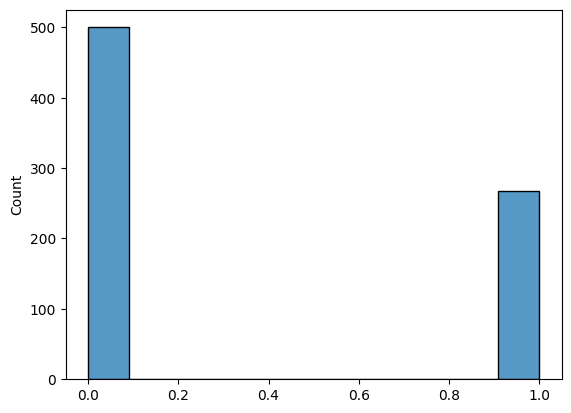

In [16]:
sns.histplot(y)

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [82]:
tree = DecisionTreeClassifier(max_features=3, random_state=0, max_depth=6)
bc = BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=0)

scores = cross_val_score(bc, X, y=y, scoring='f1_macro', cv=10)
avg_score = np.mean(scores)
std_score = np.std(scores)

print('{:.4f}+-{:.2f}'.format(avg_score, std_score))

0.7284+-0.06


### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [83]:
rf = RandomForestClassifier(n_estimators=100, max_features=3, random_state=0, max_depth=6)

scores = cross_val_score(rf, X, y=y, scoring='f1_macro', cv=10)
avg_score = np.mean(scores)
std_score = np.std(scores)

print('{:.4f}+-{:.2f}'.format(avg_score, std_score))

0.7285+-0.07


### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [78]:
dt = DecisionTreeClassifier(max_depth=2)
ab = AdaBoostClassifier(base_estimator=dt, n_estimators=25, random_state=0)

scores = cross_val_score(ab, X, y=y, scoring='f1_macro', cv=10)
avg_score = np.mean(scores)
std_score = np.std(scores)

print('{:.4f}+-{:.2f}'.format(avg_score, std_score))

0.7138+-0.04


### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [44]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)

scores = cross_val_score(gbc, X, y=y, scoring='f1_macro', cv=10)
avg_score = np.mean(scores)
std_score = np.std(scores)

print('{:.4f}+-{:.2f}'.format(avg_score, std_score))

0.7283+-0.06


### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [ ]:
#!pip install xgboost

In [53]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=0, learning_rate=.1, max_depth=3)

scores = cross_val_score(xgb, X, y=y, scoring='f1_macro', cv=10)
avg_score = np.mean(scores)
std_score = np.std(scores)

print('{:.4f}+-{:.2f}'.format(avg_score, std_score))

0.7379+-0.07


### 8. Resultados
Crea un series con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [84]:
d_models={'BaggingClassifier': bc, 'RandomForestClassifier': rf, 
            'AdaBoostClassifier': ab, 'GradientBoostingClassifier': gbc, 
            'XGBClassifier': xgb}

df_res = pd.DataFrame({'Ground_Truth':y})
# df_scores = pd.DataFrame([])
d_scores = {}

for name, model in d_models.items():
    model.fit(X, y)
    y_hat = model.predict(X)
    df_res[name] = y_hat

    auc = roc_auc_score(y, y_hat)
    d_scores[name] = [auc]

df_scores = pd.DataFrame(d_scores).T

In [85]:
df_scores.sort_values(by=0, ascending=False)

,0
GradientBoostingClassifier,0.883851
BaggingClassifier,0.873985
RandomForestClassifier,0.860657
AdaBoostClassifier,0.856657
XGBClassifier,0.846597


In [61]:
d_scores

{'BaggingClassifier': 1.0,
 'RandomForestClassifier': 1.0,
 'AdaBoostClassifier': 1.0,
 'GradientBoostingClassifier': 0.8838507462686567,
 'XGBClassifier': 0.8465970149253731}